<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [45]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [46]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [47]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
x_train[0].shape

(32, 32, 3)

In [49]:
import matplotlib.pyplot as plt

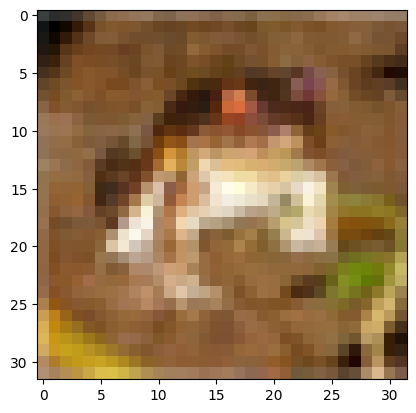

In [50]:
# FROG
plt.imshow(x_train[0])

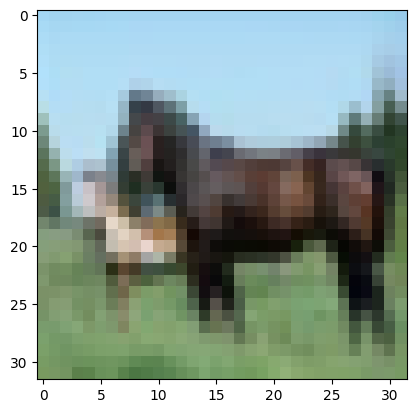

In [51]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [52]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [53]:
x_train[0].shape

(32, 32, 3)

In [54]:
x_train.max()

np.uint8(255)

In [55]:
x_train = x_train/225

In [56]:
x_test = x_test/255

In [57]:
x_train.shape

(50000, 32, 32, 3)

In [58]:
x_test.shape

(10000, 32, 32, 3)

## Labels

There are 10 classes defined in the CIFAR-10 set:

In [115]:
CIFAR_10_LABELS = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck",
}

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
y_train.shape

(50000, 1)

In [61]:
y_train[0]

array([6], dtype=uint8)

In [62]:
y_cat_train = to_categorical(y_train,10)

In [63]:
y_cat_train.shape

(50000, 10)

In [64]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [65]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [67]:
print(f"Bij de MNIST: 28x28x1 -> {28 * 28}")
print(f"Bij de MNIST: 32x32x3 -> {32 * 32 * 3}")

Bij de MNIST: 28x28x1 -> 784
Bij de MNIST: 32x32x3 -> 3072


In [68]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss',patience=3, verbose=1)

In [72]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3851 - loss: 1.6920 - val_accuracy: 0.5374 - val_loss: 1.2688
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5838 - loss: 1.1835 - val_accuracy: 0.5865 - val_loss: 1.1647
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6421 - loss: 1.0178 - val_accuracy: 0.6283 - val_loss: 1.0497
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6810 - loss: 0.9046 - val_accuracy: 0.6531 - val_loss: 1.0039
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7170 - loss: 0.8113 - val_accuracy: 0.6600 - val_loss: 0.9768
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7502 - loss: 0.7174 - val_accuracy: 0.6588 - val_loss: 0.9914
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7802 - loss: 0.6308 - val_accuracy: 0.6679 - val_loss: 0.9842
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8052 - loss: 0.5598 - 

In [73]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [75]:
losses = pd.DataFrame(model.history.history)

In [83]:
losses.tail(10)

,accuracy,loss,val_accuracy,val_loss
0,0.46772,1.477166,0.5374,1.268782
1,0.59426,1.152813,0.5865,1.164715
2,0.64440,1.013775,0.6283,1.049736
3,0.68272,0.905058,0.6531,1.003857
4,0.71566,0.811897,0.6600,0.976767
5,0.74536,0.728378,0.6588,0.991355
6,0.77178,0.653215,0.6679,0.984157
7,0.79456,0.577920,0.6628,1.033184


<Axes: >

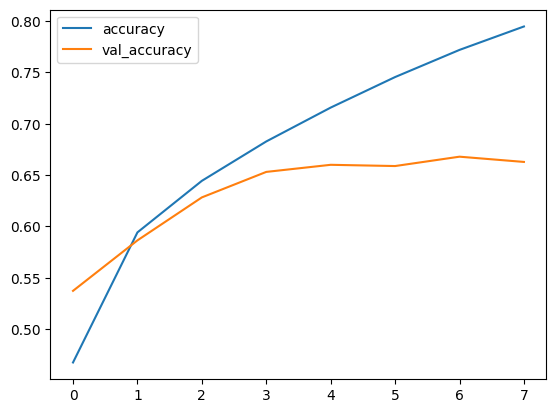

In [77]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

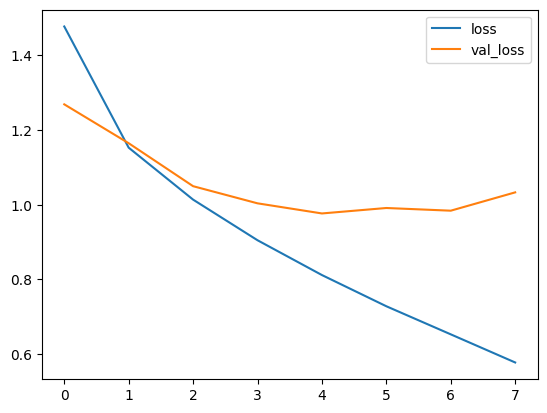

In [78]:
losses[['loss','val_loss']].plot()

In [79]:
model.metrics_names

['loss', 'compile_metrics']

In [80]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6690 - loss: 1.0321
[1.0331839323043823, 0.6628000140190125]


In [88]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions, axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.1758548e-04, 2.3151520e-03, 5.7393098e-03, ..., 2.6905516e-05,
        1.1813559e-03, 2.0039457e-05],
       [5.1345903e-01, 2.7882108e-01, 2.0355579e-05, ..., 3.2431774e-06,
        1.6136849e-01, 4.6302639e-02],
       [7.1388103e-02, 4.1176376e-01, 5.3250257e-02, ..., 1.4754728e-02,
        1.5714034e-01, 2.6176900e-01],
       ...,
       [1.9972067e-07, 3.9230907e-10, 1.1035650e-02, ..., 1.4863583e-03,
        9.5171160e-09, 3.0177965e-08],
       [1.1783712e-02, 2.9985031e-01, 9.3891183e-03, ..., 4.3213591e-02,
        1.0423173e-05, 3.6913311e-04],
       [7.5200262e-08, 4.9074700e-08, 1.4358808e-04, ..., 9.9744308e-01,
        1.6724300e-08, 2.6449788e-08]], dtype=float32)

In [89]:
prediction_classes

array([3, 0, 1, ..., 5, 4, 7])

In [99]:
prediction_classes = prediction_classes.reshape((10000, 1))
prediction_classes.shape

(10000, 1)

In [100]:
print(prediction_classes[0:10])

[[3]
 [0]
 [1]
 [0]
 [4]
 [6]
 [5]
 [6]
 [3]
 [1]]


In [101]:
print(y_test[0:10])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [102]:
y_test.shape

(10000, 1)

In [103]:
print(classification_report(y_test,prediction_classes))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1000
           1       0.82      0.76      0.79      1000
           2       0.49      0.63      0.55      1000
           3       0.49      0.42      0.45      1000
           4       0.56      0.71      0.62      1000
           5       0.57      0.57      0.57      1000
           6       0.69      0.77      0.73      1000
           7       0.80      0.65      0.72      1000
           8       0.81      0.73      0.77      1000
           9       0.78      0.70      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.67     10000
weighted avg       0.67      0.66      0.67     10000



In [105]:
confusion_matrix(y_test,prediction_classes)

array([[688,  18, 117,  16,  36,   6,  15,   8,  70,  26],
       [ 20, 761,  25,  14,   8,   7,  21,   4,  35, 105],
       [ 38,   4, 630,  62, 100,  58,  73,  24,   5,   6],
       [ 15,   9, 114, 424, 104, 190,  97,  23,  10,  14],
       [  5,   1, 106,  48, 706,  33,  50,  42,   6,   3],
       [  8,   4,  81, 166,  84, 567,  43,  34,   6,   7],
       [  3,   4,  76,  52,  57,  22, 770,   8,   3,   5],
       [ 22,   2,  55,  37, 125,  82,  13, 653,   2,   9],
       [ 85,  34,  44,  25,  23,  13,  12,   6, 732,  26],
       [ 47,  91,  31,  29,  21,  16,  16,  17,  35, 697]])

<Axes: >

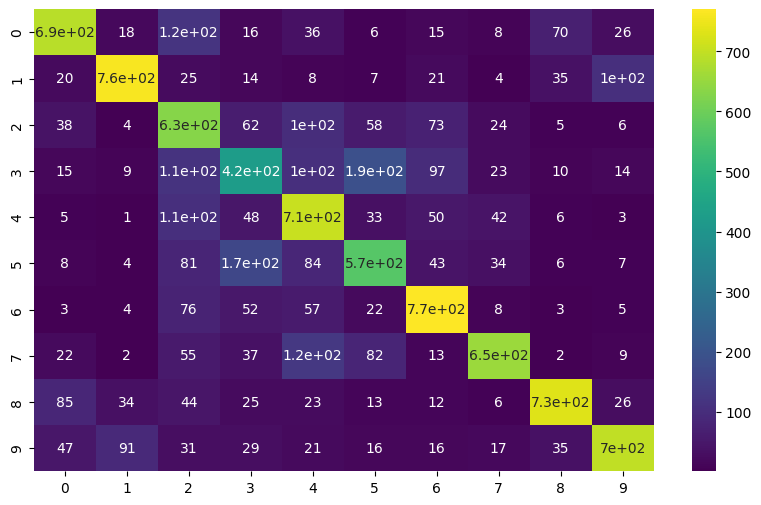

In [109]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction_classes),annot=True, cmap="viridis")
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [137]:
selected_picture_index = 16
selected_picture_index = 20
selected_picture_index = 30
my_image = x_test[selected_picture_index]
my_image_label = y_test[selected_picture_index,0]
print(type(my_image_label), my_image_label.shape, my_image_label)


<class 'numpy.uint8'> () 6


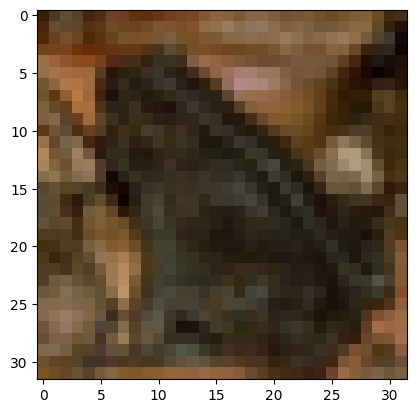

In [138]:
plt.imshow(my_image)

In [139]:
# SHAPE --> (num_images,width,height,color_channels)
predict_proba = model.predict(my_image.reshape(1,32,32,3))
predicted_class = np.argmax(predict_proba, axis=1)[0]
print(type(predicted_class), predicted_class.shape, predicted_class)
print(f"I think it is a {predicted_class}/{CIFAR_10_LABELS[5]}")
if predicted_class == my_image_label:
    print(f" and yes it is a {my_image_label}/{CIFAR_10_LABELS[int(my_image_label)]}")
else:
    print(f" but no, it is a {my_image_label}/{CIFAR_10_LABELS[my_image_label]}")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.int64'> () 6
I think it is a 6/dog
 and yes it is a 6/frog


In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html